In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [77]:
iris = load_iris()
X = iris.data
y = iris.target

In [78]:
X.shape, y.shape

((150, 4), (150,))

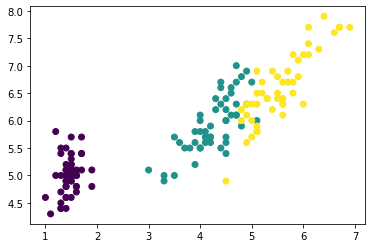

In [79]:
# fig, axes = plt.subplots(3,3)
plt.scatter(x = X[:,2], y = X[:,0], c = y)

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
ss = StandardScaler()

In [82]:
X_train = ss.fit_transform(X)

In [83]:
X_train.shape

(150, 4)

In [84]:
X_train[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

In [85]:
# x = [-2.1, -1,  4.3]
# >>> y = [3,  1.1,  0.12]
# >>> X = np.stack((x, y), axis=0)
# >>> np.cov(X)
# array([[11.71      , -4.286     ], # may vary
#        [-4.286     ,  2.144133]])
# >>> np.cov(x, y)
# array([[11.71      , -4.286     ], # may vary
#        [-4.286     ,  2.144133]])
# >>> np.cov(x)
# array(11.71)

In [86]:
x1 = np.array([-2.1, -1,  4.3])
y1 = np.array([3,  1.1,  0.12])
np.var(x)

7.806666666666666

In [87]:
np.cov(x1, ddof=0)

array(7.80666667)

In [88]:
np.mean((x1 - np.mean(x1))**2)

7.806666666666666

In [89]:
np.mean( (x1 - np.mean(x1)) * (y1-np.mean(y1))  )

-2.8573333333333335

In [90]:
np.cov(x1,y1,ddof = 0)

array([[ 7.80666667, -2.85733333],
       [-2.85733333,  1.42942222]])

In [108]:
# find covariance matrix
cov_matrix = np.cov([ X_train[:,0], X_train[:,1], X_train[:,2], X_train[:,3] ], ddof=0)
cov_matrix

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [109]:
# find eigen value and vector
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
eigen_values

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [110]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [111]:
# top 2 eigen vectos which is unit vector
pc_2d_vec = eigen_vectors[:2,:]
pc_2d_vec

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962]])

In [112]:
pc_2d_vec[0]

array([ 0.52106591, -0.37741762, -0.71956635,  0.26128628])

In [113]:
np.sqrt(sum(pc_2d_vec[0]**2))

0.9999999999999999

In [114]:
X_train.shape

(150, 4)

In [115]:
X_train_2d = np.dot(X_train, pc_2d_vec.T)
X_train_2d

array([[-2.33230083e-01, -8.63303045e-01],
       [ 7.48985953e-02,  2.64667843e-01],
       [-1.84236628e-01, -1.09029027e-01],
       [-2.42289361e-01,  1.63926968e-01],
       [-3.83246845e-01, -1.04320646e+00],
       [-4.45249533e-01, -1.80221610e+00],
       [-4.27638321e-01, -5.03839930e-01],
       [-2.50384516e-01, -6.04237082e-01],
       [-1.53903326e-01,  6.40388798e-01],
       [-8.72737031e-02,  8.22760405e-02],
       [-2.58479671e-01, -1.37240113e+00],
       [-4.17555710e-01, -5.25074538e-01],
       [-2.26315357e-02,  3.13561940e-01],
       [-2.15618872e-01,  4.35073126e-01],
       [-1.43879926e-01, -2.18223528e+00],
       [-6.08445164e-01, -2.99060331e+00],
       [-2.81656333e-01, -1.85777623e+00],
       [-1.98836400e-01, -8.79560886e-01],
       [-2.03353560e-01, -1.67132735e+00],
       [-5.00375643e-01, -1.50328988e+00],
       [-7.96353270e-02, -7.07002043e-01],
       [-3.79101645e-01, -1.30700805e+00],
       [-4.72199434e-01, -9.68221566e-01],
       [-7.

In [116]:
df = pd.DataFrame({
    'pc1' : X_train_2d[:,0],
    'pc2' : X_train_2d[:,1],
    'target' : y
})
df

,pc1,pc2,target
0,-0.233230,-0.863303,0
1,0.074899,0.264668,0
2,-0.184237,-0.109029,0
3,-0.242289,0.163927,0
4,-0.383247,-1.043206,0
...,...,...,...
145,0.379487,-0.136378,2
146,0.505564,1.094116,2
147,0.150033,-0.022332,2
148,-0.365513,-0.795576,2


In [117]:
y.shape

(150,)

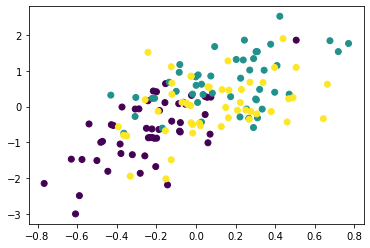

In [118]:
plt.scatter(x = X_train_2d[:,0], y = X_train_2d[:,1], c = y)

In [119]:
from sklearn.decomposition import PCA

In [130]:
pca = PCA(n_components=None)

In [131]:
pca_2d = pca.fit_transform(X_train)

In [132]:
pca_2d

array([[-2.26470281e+00,  4.80026597e-01, -1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01, -2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01,  4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01,  9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01,  1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00,  2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02,  3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01, -8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00,  1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01, -2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00, -2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01,  9.37592444e-02,
      

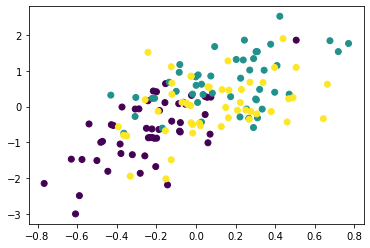

In [123]:
plt.scatter(x = X_train_2d[:,0], y = X_train_2d[:,1], c = y)

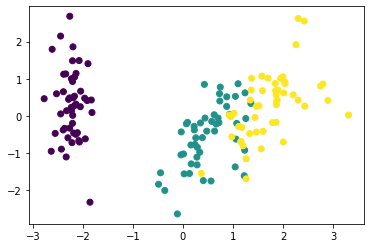

In [133]:
plt.scatter(x = pca_2d[:,0], y = pca_2d[:,1], c = y)

In [149]:
# return eigen vector there are 4 eigen vector in 4 dimentional space
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [135]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [150]:
# return eigen values which indecate how much variance explained by corresponding eigen vector
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [137]:
eigen_values

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [151]:
# return how much percentage variance explained by corresponding eigen vector
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [152]:
np.cumsum(pca.explained_variance_ratio_)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

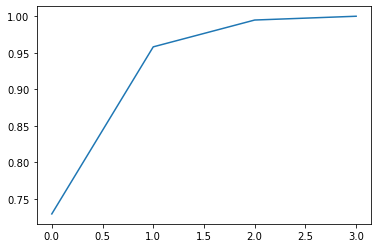

In [153]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [155]:
eigen_values

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [156]:
np.cumsum(eigen_values/sum(eigen_values))

array([0.72962445, 0.95813207, 0.99482129, 1.        ])